Data Science Capstone Project Using Python and Tableau 10

DESCRIPTION

Problem Statement NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases. The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Build a model to accurately predict whether the patients in the dataset have diabetes or not. Dataset Description The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

Variables Description Pregnancies Number of times pregnant Glucose Plasma glucose concentration in an oral glucose tolerance test BloodPressure Diastolic blood pressure (mm Hg) SkinThickness Triceps skinfold thickness (mm) Insulin Two hour serum insulin BMI Body Mass Index DiabetesPedigreeFunction Diabetes pedigree function Age Age in years Outcome Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0 Project Task: Week 1 Data Exploration:

Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:
• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

Visually explore these variables using histograms. Treat the missing values accordingly.

There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

Project Task: Week 2 Data Exploration:

Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

Perform correlation analysis. Visually explore it using a heat map.

Project Task: Week 3 Data Modeling:

Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

Project Task: Week 4

Data Modeling:

Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.
Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:
a. Pie chart to describe the diabetic or non-diabetic population

b. Scatter charts between relevant variables to analyze the relationships

c. Histogram or frequency charts to analyze the distribution of the data

d. Heatmap of correlation analysis among the relevant variables

e. Create bins of these age values: 20-25, 25-30, 30-35, etc. Analyze different variables for these age brackets using a bubble chart.

Tableau Screen Shot-

![Tableau](Tableau dashbord.PNG)

 # WEEK 1<br>
## DESCRIPTIVE ANALYSIS


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn import metrics

In [26]:
data=pd.read_csv("G://data science  project//projct 2 health//Project 2//Healthcare - Diabetes//health care diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

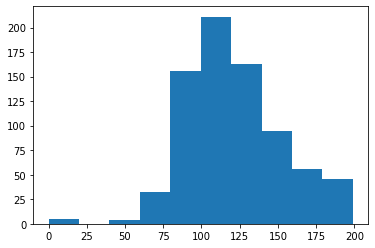

In [15]:
plt.hist(data['Glucose'])

(array([487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <BarContainer object of 10 artists>)

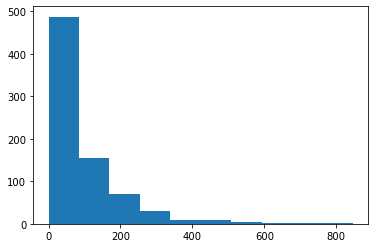

In [16]:
plt.hist(data['Insulin'])

(array([ 11.,   0.,  15., 156., 268., 224.,  78.,  12.,   3.,   1.]),
 array([ 0.  ,  6.71, 13.42, 20.13, 26.84, 33.55, 40.26, 46.97, 53.68,
        60.39, 67.1 ]),
 <BarContainer object of 10 artists>)

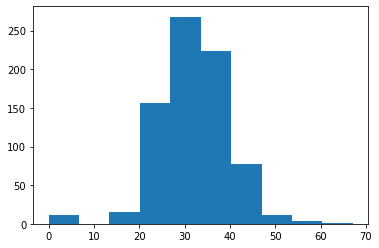

In [17]:
plt.hist(data['BMI'])

(array([ 35.,   1.,   2.,  13., 107., 261., 243.,  87.,  14.,   5.]),
 array([  0. ,  12.2,  24.4,  36.6,  48.8,  61. ,  73.2,  85.4,  97.6,
        109.8, 122. ]),
 <BarContainer object of 10 artists>)

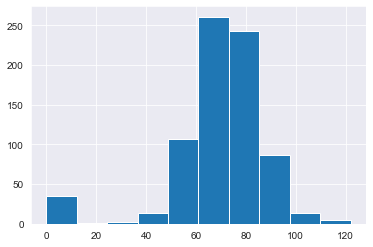

In [44]:
plt.hist(data['BloodPressure'])

(array([231., 107., 165., 175.,  78.,   9.,   2.,   0.,   0.,   1.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

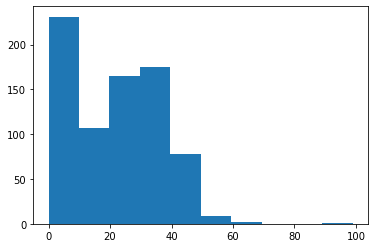

In [20]:
plt.hist(data['SkinThickness'])

<AxesSubplot:title={'center':'Checking Missing Value with Heatmap'}>

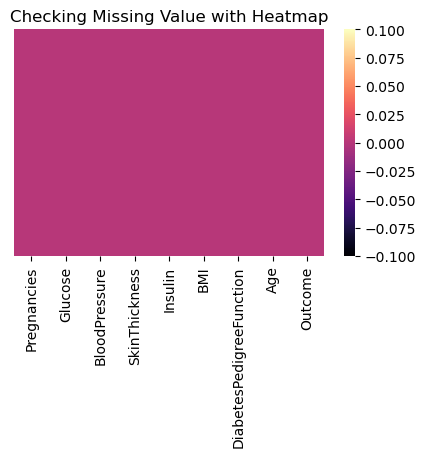

In [21]:
plt.figure(figsize=(5,3),dpi=100)
plt.title('Checking Missing Value with Heatmap')
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False)


# WEEK 2

## *Scatter plot*

In [46]:
Positive = data[data['Outcome']==1]
Positive.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1


(array([ 2.,  0.,  0.,  0.,  0.,  0.,  3., 13., 38., 61., 61., 36., 27.,
        14.,  7.,  3.,  1.,  1.,  0.,  1.]),
 array([ 0.   ,  3.355,  6.71 , 10.065, 13.42 , 16.775, 20.13 , 23.485,
        26.84 , 30.195, 33.55 , 36.905, 40.26 , 43.615, 46.97 , 50.325,
        53.68 , 57.035, 60.39 , 63.745, 67.1  ]),
 [<matplotlib.patches.Polygon at 0x1b20a1bd9d0>])

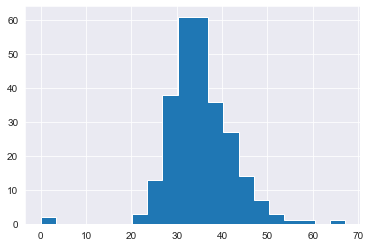

In [47]:
plt.hist(Positive['BMI'],histtype='stepfilled',bins=20)

In [48]:
Positive['BMI'].value_counts().head(10)

32.9    8
31.6    7
33.3    6
31.2    5
30.5    5
32.0    5
30.0    4
33.6    4
32.4    4
30.4    4
Name: BMI, dtype: int64

(array([ 2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  4.,  9., 28., 26., 36.,
        27., 29., 22., 24., 21., 25., 14.]),
 array([  0.  ,   9.95,  19.9 ,  29.85,  39.8 ,  49.75,  59.7 ,  69.65,
         79.6 ,  89.55,  99.5 , 109.45, 119.4 , 129.35, 139.3 , 149.25,
        159.2 , 169.15, 179.1 , 189.05, 199.  ]),
 [<matplotlib.patches.Polygon at 0x1b20cb88430>])

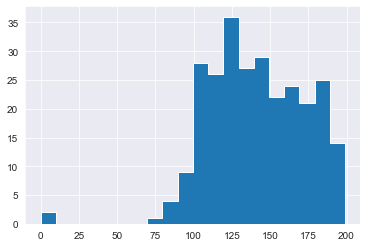

In [49]:
plt.hist(Positive['Glucose'],histtype='stepfilled',bins=20)

In [50]:
Positive['Glucose'].value_counts()

125    7
158    6
128    6
129    6
115    6
      ..
160    1
159    1
78     1
154    1
199    1
Name: Glucose, Length: 104, dtype: int64

(array([16.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  6.,  6., 19., 37., 56.,
        36., 41., 31.,  7.,  4.,  4.,  3.]),
 array([  0. ,   5.7,  11.4,  17.1,  22.8,  28.5,  34.2,  39.9,  45.6,
         51.3,  57. ,  62.7,  68.4,  74.1,  79.8,  85.5,  91.2,  96.9,
        102.6, 108.3, 114. ]),
 [<matplotlib.patches.Polygon at 0x1b20d3f48e0>])

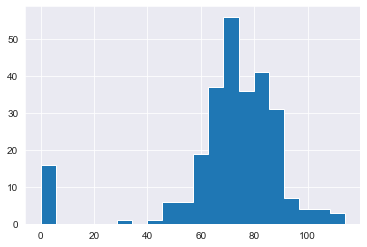

In [51]:
plt.hist(Positive['BloodPressure'],histtype='stepfilled',bins=20)

In [52]:
Positive['BloodPressure'].value_counts().head(7)

70    23
76    18
78    17
74    17
72    16
0     16
82    13
Name: BloodPressure, dtype: int64

(array([88.,  1.,  4., 10., 18., 30., 41., 34., 23., 15.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.  ,  4.95,  9.9 , 14.85, 19.8 , 24.75, 29.7 , 34.65, 39.6 ,
        44.55, 49.5 , 54.45, 59.4 , 64.35, 69.3 , 74.25, 79.2 , 84.15,
        89.1 , 94.05, 99.  ]),
 [<matplotlib.patches.Polygon at 0x1b20d464bb0>])

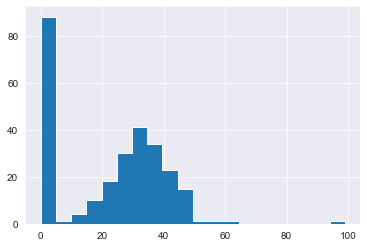

In [53]:
plt.hist(Positive['SkinThickness'],histtype='stepfilled',bins=20)

In [55]:
Positive['SkinThickness'].value_counts().head(7)

0     88
32    14
33     9
30     9
39     8
37     8
36     8
Name: SkinThickness, dtype: int64

(array([141.,   6.,  23.,  33.,  24.,  12.,   7.,   7.,   2.,   1.,   1.,
          5.,   3.,   1.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  42.3,  84.6, 126.9, 169.2, 211.5, 253.8, 296.1, 338.4,
        380.7, 423. , 465.3, 507.6, 549.9, 592.2, 634.5, 676.8, 719.1,
        761.4, 803.7, 846. ]),
 [<matplotlib.patches.Polygon at 0x1b20cecb580>])

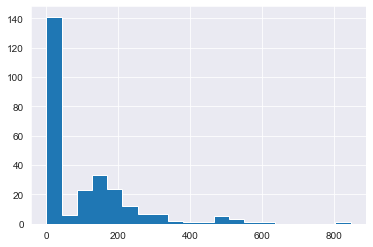

In [56]:
plt.hist(Positive['Insulin'],histtype='stepfilled',bins=20)

In [57]:
Positive['Insulin'].value_counts().head(7)

0      138
130      6
180      4
175      3
156      3
495      2
160      2
Name: Insulin, dtype: int64

In [58]:
BloodPressure = Positive['BloodPressure']
Glucose = Positive['Glucose']
SkinThickness = Positive['SkinThickness']
Insulin = Positive['Insulin']
BMI = Positive['BMI']

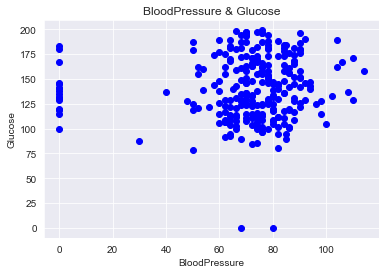

In [59]:
plt.scatter(BloodPressure, Glucose, color=['b'])
plt.xlabel('BloodPressure')
plt.ylabel('Glucose')
plt.title('BloodPressure & Glucose')
plt.show()

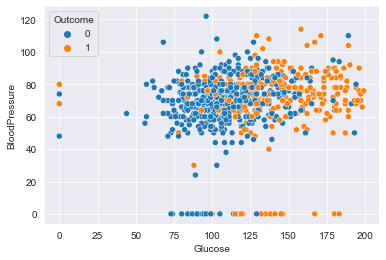

In [60]:
g =sns.scatterplot(x= "Glucose" ,y= "BloodPressure",
              hue="Outcome",
              data=data);

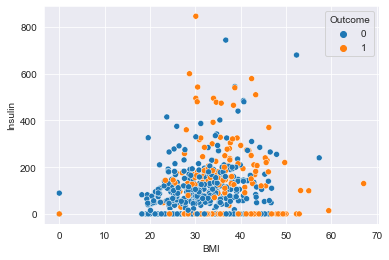

In [61]:
B =sns.scatterplot(x= "BMI" ,y= "Insulin",
              hue="Outcome",
              data=data);

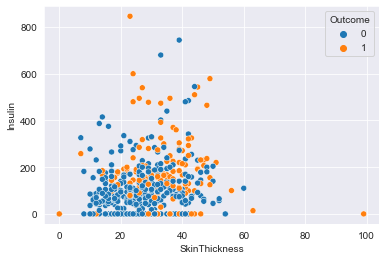

In [62]:
S =sns.scatterplot(x= "SkinThickness" ,y= "Insulin",
              hue="Outcome",
              data=data);

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


count of outcome is:
 0    500
1    268
Name: Outcome, dtype: int64


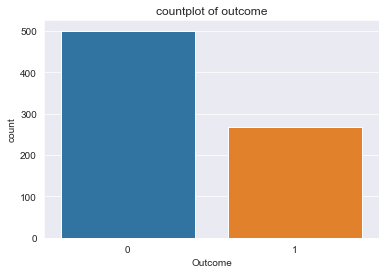

In [29]:
sns.set_style('darkgrid')
sns.countplot(data['Outcome'])
plt.title('countplot of outcome')
plt.xlabel('Outcome')
plt.ylabel('count')
print('count of outcome is:\n',data['Outcome'].value_counts())


## *Correlation Analysis*

In [30]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### We can clearly see that Glucose and BMI has good impact on outcome. There is a strong positive correlation between BMI and Skinthickness or Pregnancies and age

<AxesSubplot:>

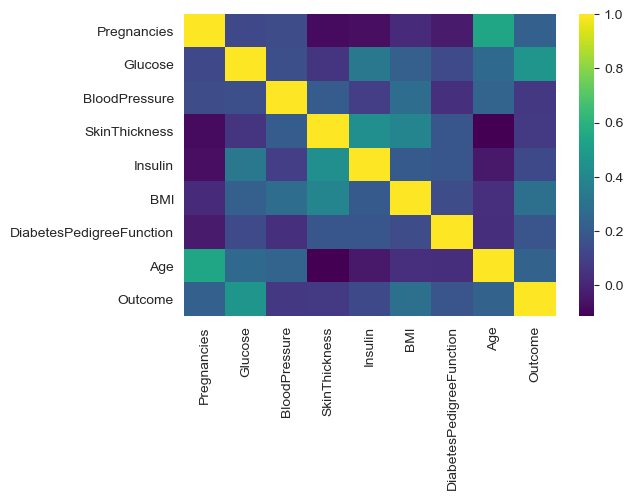

In [33]:
plt.figure(dpi=100)
sns.heatmap(data.corr(),cmap='viridis')

# WEEK 3
## Data Processing

In [73]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
features = data.iloc[:,[0,1,2,3,4,5,6,7]].values
label = data.iloc[:,8].values

In [75]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state =10)

In [79]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


In [80]:
model.fit(X_train,y_train)

LogisticRegression()

In [81]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7719869706840391
0.7662337662337663


In [82]:
from sklearn.metrics import confusion_matrix
conf_met = confusion_matrix(label,model.predict(features))
conf_met

array([[446,  54],
       [122, 146]], dtype=int64)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(label,model.predict(features)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.54      0.62       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768



AUC: 0.837


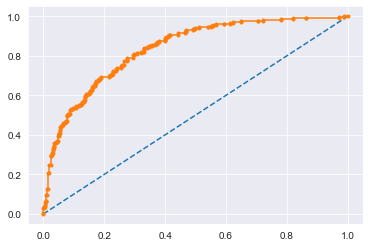

In [84]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probablty = model.predict_proba(features)
# keep probabilities for the positive outcome only
probablty = probablty[:, 1]
# calculate AUC
auc = roc_auc_score(label, probablty)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probablty)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

In [88]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=5)
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [89]:
model3.score(X_train,y_train)

0.8289902280130294

In [90]:
model3.score(X_test,y_test)

0.7597402597402597

In [92]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model4=RandomForestClassifier(n_estimators=11)
model4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=11)

In [93]:
model4.score(X_train,y_train)

0.9869706840390879

In [94]:
model4.score(X_test,y_test)

0.7337662337662337

In [95]:
#Support Vector Classifier

from sklearn.svm import SVC 
model5 = SVC(kernel='rbf',
           gamma='auto')
model5.fit(X_train,y_train)

SVC(gamma='auto')

In [96]:
model5.score(X_test,y_test)

0.6168831168831169

In [97]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

AUC: 0.836
True Positive Rate - [0.         0.06716418 0.23880597 0.44776119 0.60074627 0.75373134
 0.88059701 0.98507463 1.        ], False Positive Rate - [0.    0.    0.02  0.056 0.12  0.248 0.428 0.668 1.   ] Thresholds - [2.         1.         0.85714286 0.71428571 0.57142857 0.42857143
 0.28571429 0.14285714 0.        ]


Text(0, 0.5, 'True Positive Rate')

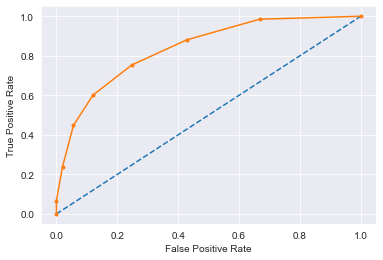

In [98]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probablty = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probablty = probablty[:, 1]
# calculate AUC
auc = roc_auc_score(label, probablty)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(label, probablty)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

f1=0.624 auc=0.726 ap=0.727


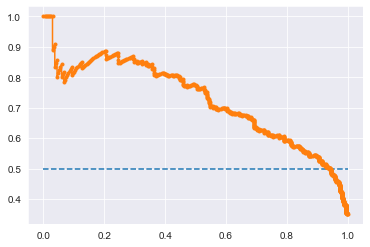

In [99]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probablty = model.predict_proba(features)
# keep probabilities for the positive outcome only
probablty = probablty[:, 1]
# predict class values
yhat = model.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probablty)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probablty)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

f1=0.658 auc=0.752 ap=0.709


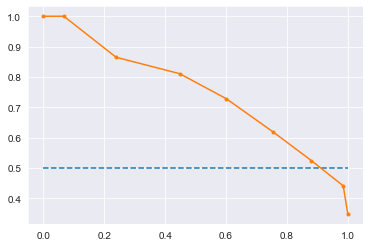

In [103]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probablty = model2.predict_proba(features)
# keep probabilities for the positive outcome only
probablty = probablty[:, 1]
# predict class values
yhat = model2.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probablty)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probablty)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')


f1=0.710 auc=0.797 ap=0.758


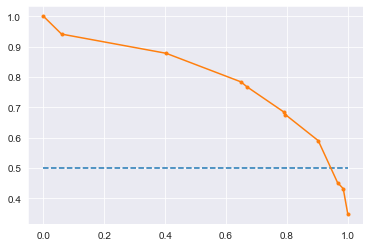

In [105]:
#Precision Recall Curve for Decission Tree Classifier

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probablty = model3.predict_proba(features)
# keep probabilities for the positive outcome only
probablty = probablty[:, 1]
# predict class values
yhat = model3.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probablty)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probablty)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall,precision,marker='.')

f1=0.904 auc=0.958 ap=0.949


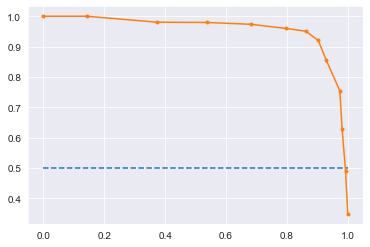

In [106]:
#Precision Recall Curve for Random Forest

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probablty= model4.predict_proba(features)
# keep probabilities for the positive outcome only
probablty = probablty[:, 1]
# predict class values
yhat = model4.predict(features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(label, probablty)
# calculate F1 score
f1 = f1_score(label, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(label, probablty)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')